In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions, StatsPlots

dir = "../../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

Calculating the maximum number of cars that can be in the network at the same time

In [2]:
SquareNet, position_array, dist_matrix = SquareDiGraph(5, doble_sentido=false);

In [3]:
total = 0
for edge in edges(SquareNet)
    total += dist_matrix[src(edge),dst(edge)]
end

print("This is the max number that can be at the same time in the 5x5 network: ", total./5)

This is the max number that can be at the same time in the 5x5 network: 416.0

In [4]:
distance = 0
count = 0
for i in vertices(SquareNet)
    for j in vertices(SquareNet)
        ij_dist = LightGraphs.dijkstra_shortest_paths(SquareNet,i).dists[j]
        if ij_dist >= 5
            distance += ij_dist
            count +=1
        end
    end
end

print("This is the average distance for cars in the 5x5 network: ", 40.0*distance./count)

This is the average distance for cars in the 5x5 network: 230.66079295154185

# Plots for analysis

In [5]:
simulations_path = "../../simulaciones-cluster/un-sentido/sin-diagonal/redsize5/"


"../../simulaciones-cluster/un-sentido/sin-diagonal/redsize5/"

## Read a single file

In [6]:
reads=CSV.read(simulations_path*"nautos1000/1/Datos-RS5-N1000-R1.csv",DataFrame);

In [7]:
# Get daily times and daily means
daily_times = [parse.(Float64, split(chop(reads.times[i]; head=1, tail=1), ", ")) for i in 1:50];
daily_mean_times = [mean(daily_times[i]) for i in 1:50];

# Get daily speeds and daily means
daily_speeds = [parse.(Float64, split(chop(reads.speeds[i]; head=1, tail=1), ", ")) for i in 1:50];
daily_mean_speeds = [mean(daily_speeds[i]) for i in 1:50];

# Get daily indexes and daily means
daily_indexes = [parse.(Float64, split(chop(reads.indexes[i]; head=4, tail=1), ", ")) for i in 1:50];
daily_mean_indexes = [mean(daily_indexes[i]) for i in 1:50];

In [8]:
df = DataFrame(a = 1:length(daily_times), times = daily_times, speeds = daily_speeds, ind = daily_indexes);

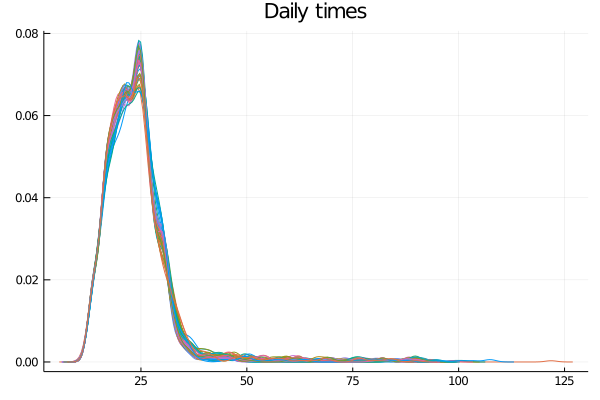

In [9]:
@df df StatsPlots.density(:times, title="Daily times", legend=false)

In [10]:
round(mean(daily_mean_times),digits=2)

23.79

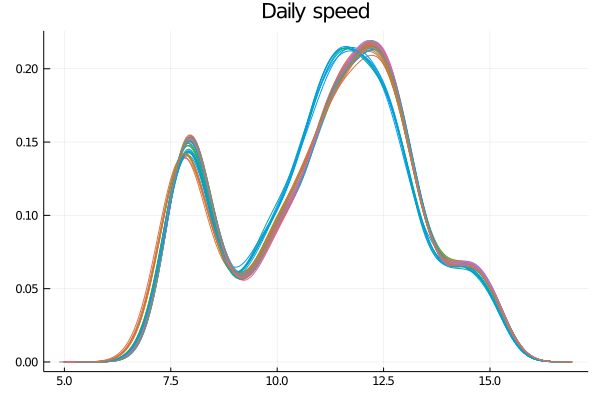

In [11]:
@df df StatsPlots.density(:speeds, title="Daily speed", legend=false)

In [12]:
round(mean(daily_mean_speeds),digits=2)

11.14

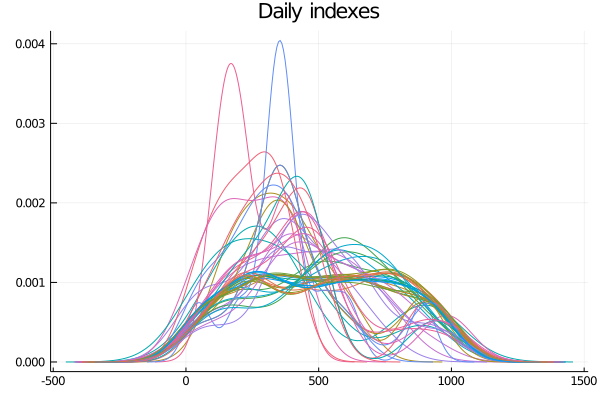

In [13]:
@df df StatsPlots.density(:ind, title="Daily indexes", legend=false)

In [14]:
round(mean(daily_mean_indexes),digits=2)

454.96

In [15]:
# Get daily indexes and daily means
# daily_indexes = [parse.(Float64, split(chop(reads.indexes[i]; head=4, tail=1), ", ")) for i in 1:50];
# daily_mean_indexes = [mean(daily_indexes[i]) for i in 1:50];

# anim = @animate for i in 1:50
#     histogram(daily_indexes[i],nbins=20,title = "Indexes \n day: "*string(i), label="")
#     xlims!(-5.0, 1005.0)
#     ylims!(0.0, 25.0)
#     vline!([daily_mean_indexes[i]], label = "mean that day: "*string(round(daily_mean_indexes[i],digits=2)))
#     vline!([mean(daily_mean_indexes)], label = "overall mean: "*string(round(mean(daily_mean_indexes),digits=2)))
# end

# gif(anim, "../../gifs/indexes_repetition1.gif", fps = 2)

## Read a the results of a number of cars

In [16]:
reads_1000 = [CSV.read(simulations_path*"nautos1000/"*string(i)*"/Datos-RS5-N1000-R"*string(i)*".csv",DataFrame) for i in 1:10];

In [17]:
# Distribution of average times over repetitions
daily_times = [[parse.(Float64, split(chop(reads_1000[j].times[i]; head=1, tail=1), ", ")) for i in 1:50] for j in 1:10];
daily_mean_times = [[mean(daily_times[j][i]) for i in 1:50] for j in 1:10];
repetition_mean_times = [mean(daily_mean_times[i]) for i in 1:10];

# Distribution of average speeds over repetitions
daily_speeds = [[parse.(Float64, split(chop(reads_1000[j].speeds[i]; head=1, tail=1), ", ")) for i in 1:50] for j in 1:10];
daily_mean_speeds = [[mean(daily_speeds[j][i]) for i in 1:50] for j in 1:10];
repetition_mean_speeds = [mean(daily_mean_speeds[i]) for i in 1:10];

# Distribution of average indexes over repetitions
to_parse = [[split(chop(reads_1000[j].indexes[i]; head=4, tail=1), ", ") for i in 1:50] for j in 1:10];
daily_indexes = [[(to_parse[j][i]==[""] ? [] : parse.(Float64, to_parse[j][i]) ) for i in 1:50] for j in 1:10];
daily_mean_indexes = [[(daily_indexes[j][i]!=[] ? mean(daily_indexes[j][i]) : NaN) for i in 1:50] for j in 1:10];
repetition_mean_indexes = [mean(filter(!isnan, daily_mean_indexes[i])) for i in 1:10];

# Distribution of number of cars changing each repetition
to_parse = [[split(chop(reads_1000[j].indexes[i]; head=4, tail=1), ", ") for i in 1:50] for j in 1:10];
daily_indexes = [[(to_parse[j][i]==[""] ? [] : parse.(Float64, to_parse[j][i]) ) for i in 1:50] for j in 1:10];
daily_number_indexes = [[length(daily_indexes[j][i]) for i in 1:50] for j in 1:10];
repetition_mean_number_indexes = [mean(filter(!isnan, daily_number_indexes[i])) for i in 1:10];

In [18]:
df2 = DataFrame(a = 1:length(daily_mean_times), times = daily_mean_times, speeds = daily_mean_speeds, ind = daily_mean_indexes, num_changing_cars = daily_number_indexes);

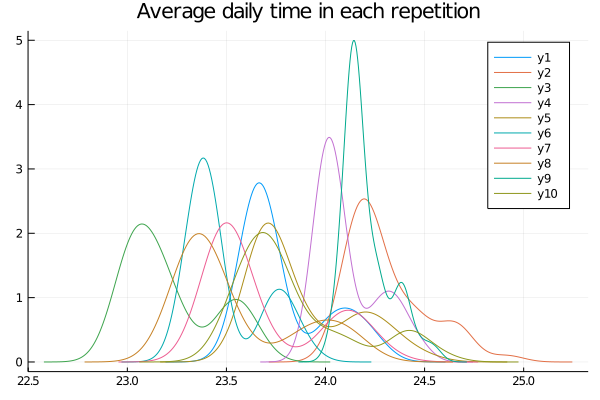

In [19]:
@df df2 StatsPlots.density(:times, title="Average daily time in each repetition")

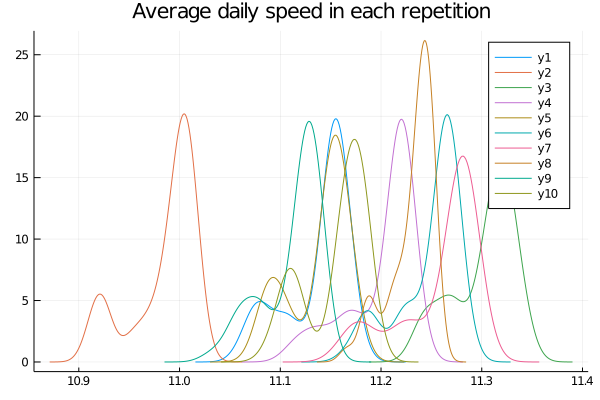

In [20]:
@df df2 StatsPlots.density(:speeds, title="Average daily speed in each repetition")

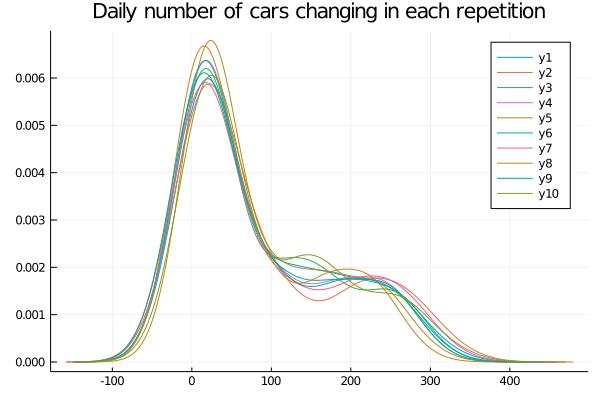

In [21]:
@df df2 StatsPlots.density(:num_changing_cars, title="Daily number of cars changing in each repetition")

In [22]:
mean(repetition_mean_number_indexes)

83.24600000000001

In [23]:
# Distribution of average indexes over repetitions
# to_parse = [[split(chop(reads_1000[j].indexes[i]; head=4, tail=1), ", ") for i in 1:50] for j in 1:10];
# daily_indexes = [[(to_parse[j][i]==[""] ? [] : parse.(Float64, to_parse[j][i]) ) for i in 1:50] for j in 1:10];
# daily_mean_indexes = [[(daily_indexes[j][i]!=[] ? mean(daily_indexes[j][i]) : NaN) for i in 1:50] for j in 1:10];
# repetition_mean_indexes = [mean(filter(!isnan, daily_mean_indexes[i])) for i in 1:10];

# anim = @animate for i in 1:10
#     histogram(daily_mean_indexes[i],nbins=15,title = "Indexes \n repetition: "*string(i), label="")
#     xlims!(200.0, 900.0)
#     ylims!(0.0, 30.0)
#     vline!([repetition_mean_indexes[i]], label = "mean that repetition: "*string(round(repetition_mean_indexes[i],digits=2)))
#     vline!([mean(repetition_mean_indexes)], label = "overall mean: "*string(round(mean(repetition_mean_indexes),digits=2)))
# end

# gif(anim, "../../gifs/indexes_1000cars.gif", fps = 2)

In [24]:
# Distribution of number of cars changing each repetition
# to_parse = [[split(chop(reads_1000[j].indexes[i]; head=4, tail=1), ", ") for i in 1:50] for j in 1:10];
# daily_indexes = [[(to_parse[j][i]==[""] ? [] : parse.(Float64, to_parse[j][i]) ) for i in 1:50] for j in 1:10];
# daily_number_indexes = [[length(daily_indexes[j][i]) for i in 1:50] for j in 1:10];
# repetition_mean_number_indexes = [mean(filter(!isnan, daily_number_indexes[i])) for i in 1:10];

# anim = @animate for i in 1:10
#     histogram(daily_number_indexes[i],nbins=10,title = "Number of cars changing \n repetition: "*string(i), label="")
#     xlims!(0.0, 350.0)
#     ylims!(0.0, 35.0)
#     vline!([repetition_mean_number_indexes[i]], label = "average number that repetition: "*string(round(repetition_mean_number_indexes[i],digits=2)))
#     vline!([mean(repetition_mean_number_indexes)], label = "overall mean: "*string(round(mean(repetition_mean_number_indexes),digits=2)))
# end

# gif(anim, "../../gifs/indexes_1000cars.gif", fps = 2)

## Results of all number of cars 1000-3000

In [29]:
J = [[(1000 + 100*j) for j in 0:7];[1850, 2000, 2500, 3000]];

In [33]:
reads_general = [[CSV.read(simulations_path*"nautos"*string(j)*"/"*string(i)*"/Datos-RS5-N"*string(j)*"-R"*string(i)*".csv",DataFrame) for i in 1:10] for j in J];

In [54]:
# Distribution of average times over repetitions
# k es el número de repetición, número de autos J[k]
daily_times = [[[parse.(Float64, split(chop(reads_general[k][j].times[i]; head=1, tail=1), ", ")) for i in 1:50] for j in 1:10] for k in 1:12];
daily_mean_times = [[[mean(daily_times[k][j][i]) for i in 1:50] for j in 1:10] for k in 1:12];
repetition_mean_times = [[mean(daily_mean_times[k][i]) for i in 1:10] for k in 1:12];

In [71]:
df3 = DataFrame(a = J[1:4], times = repetition_mean_times[1:4]);

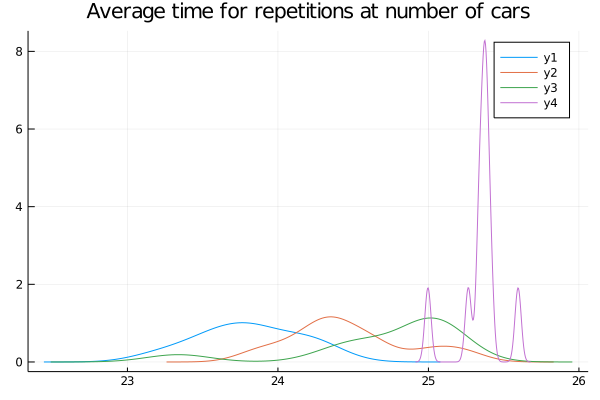

In [76]:
@df df3 StatsPlots.density(:times, title="Average time for repetitions at number of cars")

In [77]:
J[1:4]

4-element Array{Int64,1}:
 1000
 1100
 1200
 1300